In [1]:
# Import des librairies d'environnement
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("notebook")
sns.set_style("whitegrid")

In [2]:
# Import des librairies local
import sys
sys.path.append('../src')
from connect import JskDB, my_function

In [3]:
# chargement des données dans les dataframes

sql_connection = JskDB().create_connection()

df_snap_channels = pd.read_sql_table(table_name='snap_channels', con=sql_connection)
df_snap_behavior = pd.read_sql_table(table_name='snap_behavior', con=sql_connection)
df_snap_audience = pd.read_sql_table(table_name='snap_audience', con=sql_connection)
df_snap_stories = pd.read_sql_table(table_name='snap_stories', con=sql_connection)

sql_connection.close()

# Étude de l'Audience "Riddle Me This" et "Accuse moi si tu peux"

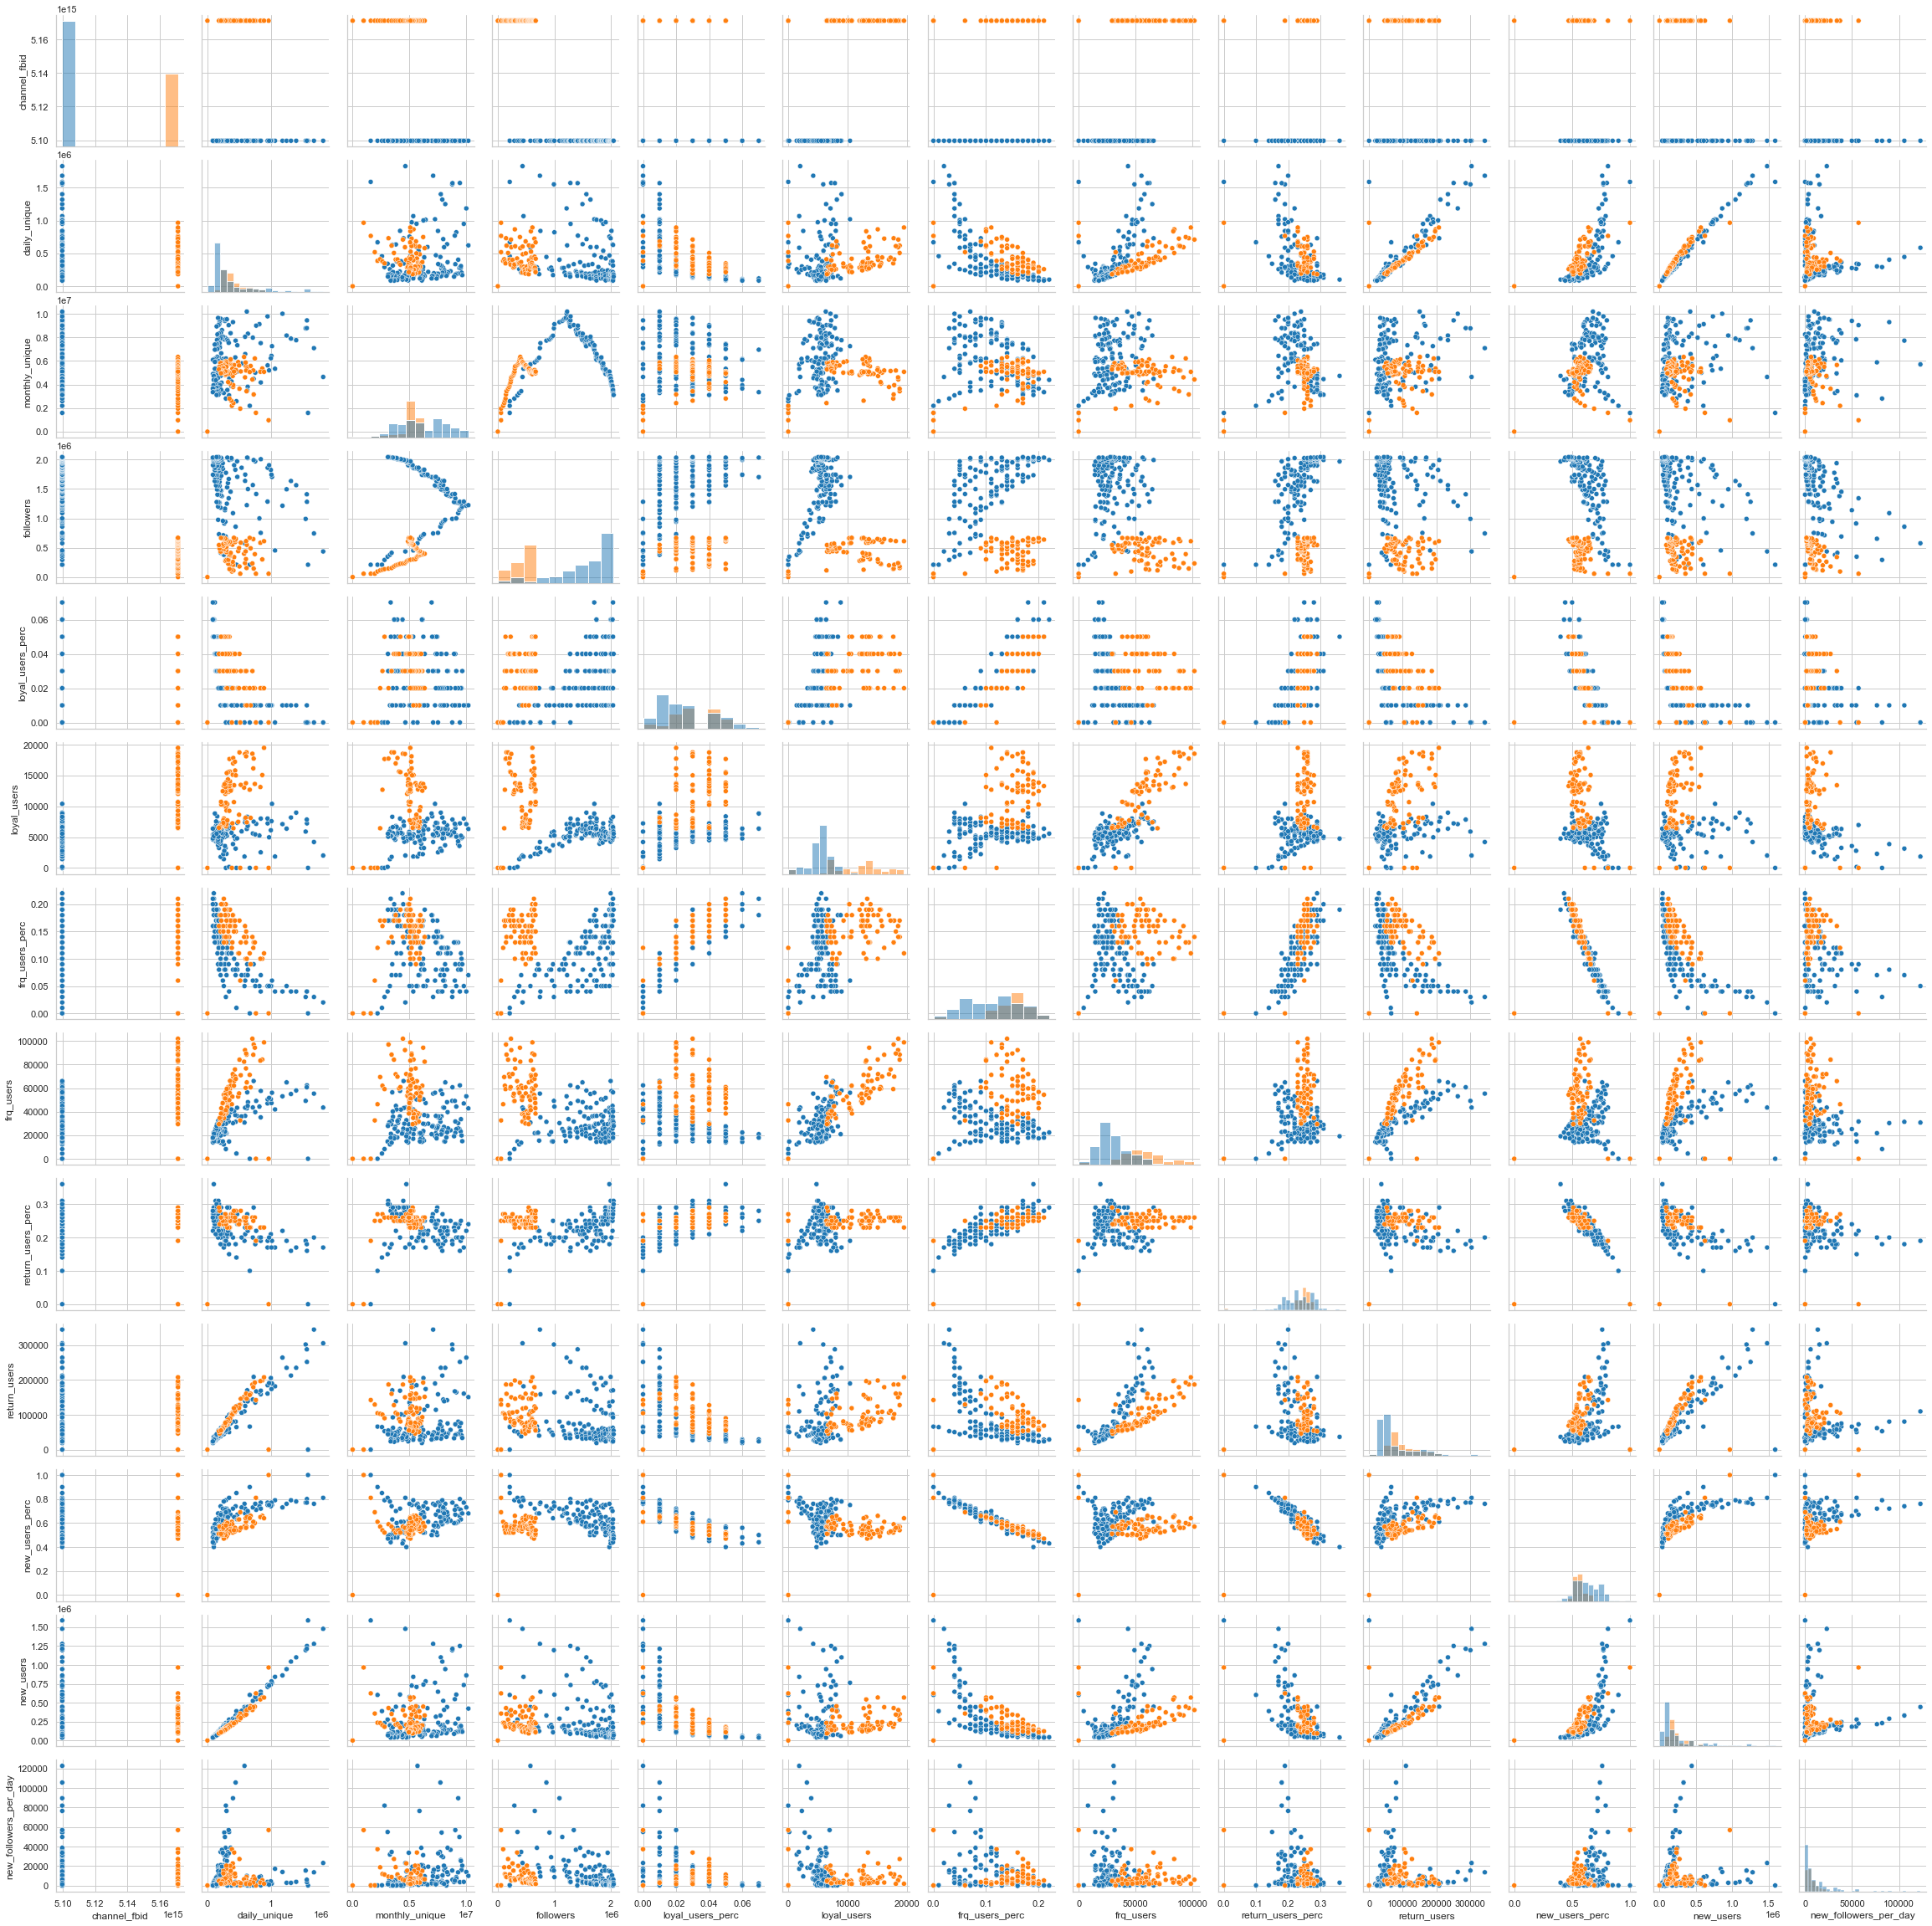

In [4]:
# On selectionne uniquement deux chaines
filter_list = ['Riddle Me This', 'Accuse moi si tu peux']
df_snap_audience_filter = df_snap_audience[df_snap_audience.channel_name.isin(filter_list)]

# création graphique des variables
g = sns.PairGrid(df_snap_audience_filter, hue='channel_name')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# enregistrement des graphiques
plt.savefig('../img/audiencePairgrid.png')

**Remarque(s)** : On observe des tendances hebdomadaires concernant la variable return_user (les utilisateurs qui reviennent consulter la chaine), new_user (nouvel utilisateur) et enfin la variable frq_users
Une tendance interessante mais cette fois ci mensuel concernant la variable followers.
Dans la suite nous allons nous concentrer uniquement sur ces variables

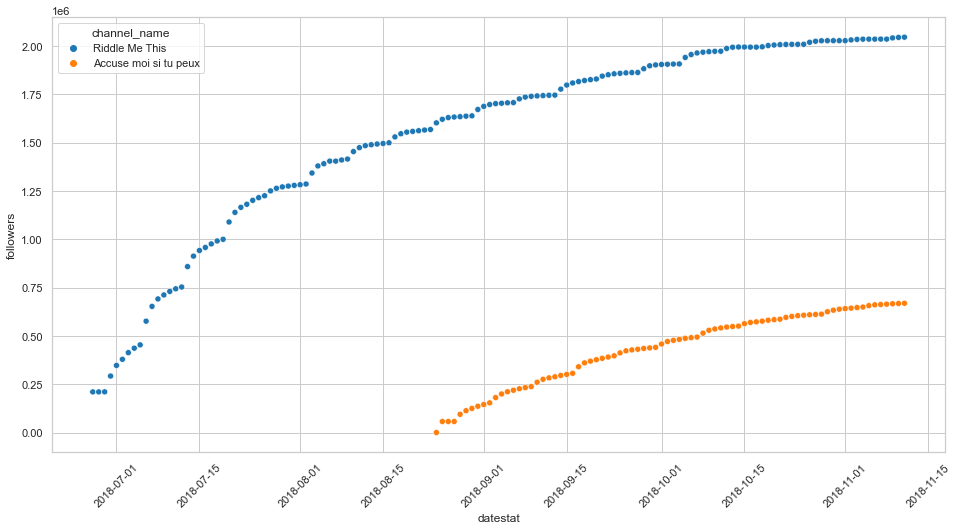

In [5]:
# observation du nombre de followers
plt.figure(figsize=(16,8))
sns.scatterplot(data = df_snap_audience_filter, x='datestat', y='followers', hue='channel_name')
plt.xticks(rotation=45);

La tendance se confirme, le nombre d'abonnées par mensuel à fortement, atteins un pic, puis décroits. On peut donc estimer que le nombre de followers ralentit.

**Conclusion** : la chaine Riddle Me à plus de 2M de followers mais la chaine Accuse moi si tu peux 0.7M. Le lancement de la chaine francaise n'a pas eu d'impact sur le nombre de followers US.

## Observations Frq_users "Riddle" Vs "Accuse moi si tu peux"

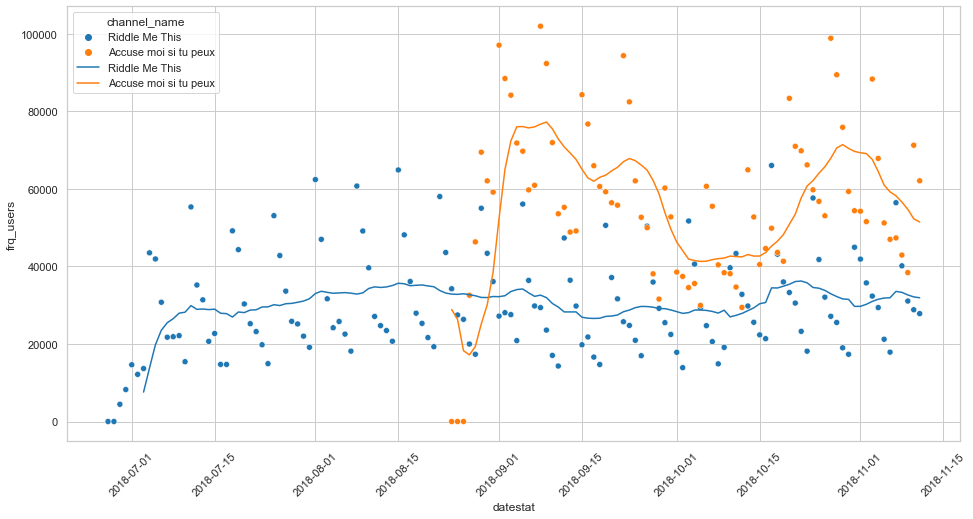

In [6]:
# observation du nombre de frq_users
plt.figure(figsize=(16,8))
sns.scatterplot(data = df_snap_audience_filter, x='datestat', y='frq_users', hue='channel_name')
weekAverage = df_snap_audience_filter['frq_users'].rolling(7).mean()
sns.lineplot(data=df_snap_audience_filter, x='datestat', y=weekAverage, hue='channel_name')
plt.xticks(rotation=45);

In [7]:
mean = pd.pivot_table(df_snap_audience_filter, index='channel_name', aggfunc='mean')
med = pd.pivot_table(df_snap_audience_filter, index='channel_name', aggfunc='median')
print('########################## Moyenne ##########################', '\n')
print(mean.frq_users)
print('########################## Mediane ##########################', '\n')
print(med.frq_users)

########################## Moyenne ########################## 

channel_name
Accuse moi si tu peux    56598.412500
Riddle Me This           30069.768116
Name: frq_users, dtype: float64
########################## Mediane ########################## 

channel_name
Accuse moi si tu peux    55650
Riddle Me This           27326
Name: frq_users, dtype: int64


**Remarque(s)** : la fréquence des utilisateurs qui consulte la chaine US est stable et se stabilise rapidement en moyenne à 30k tandis que la chaine Fr subit plus de variation mais la fréquence est de 56k. La chaine Fr à donc une fréquence d'utilisateur supérieur comparativement a la chaine US

## Observations new_users "Riddle" Vs "Accuse moi si tu peux"

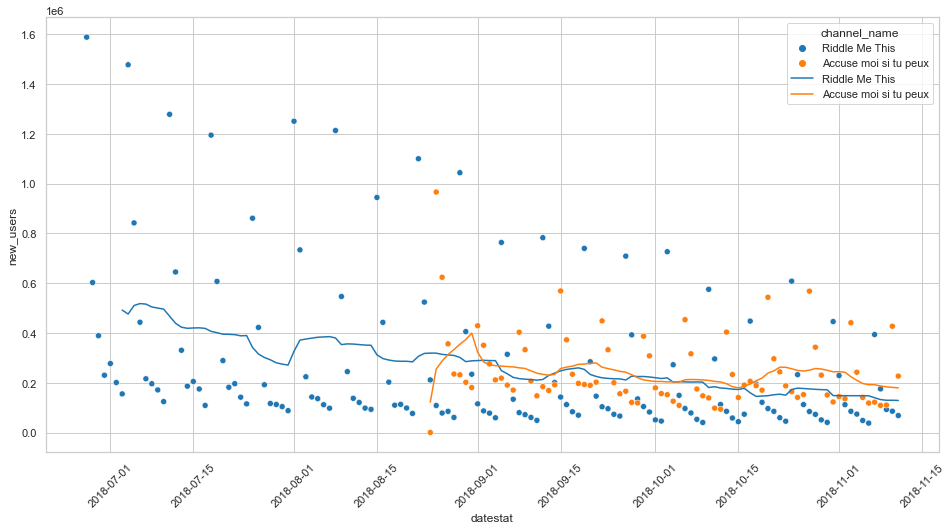

In [8]:
# Observation du nombres de new_users
plt.figure(figsize=(16,8))
sns.scatterplot(data = df_snap_audience_filter, x='datestat', y='new_users', hue='channel_name')
weekAverage = df_snap_audience_filter['new_users'].rolling(7).mean()
sns.lineplot(data=df_snap_audience_filter, x='datestat', y=weekAverage, hue='channel_name')
plt.xticks(rotation=45);

In [9]:
mean = pd.pivot_table(df_snap_audience_filter, index='channel_name', aggfunc='mean')
med = pd.pivot_table(df_snap_audience_filter, index='channel_name', aggfunc='median')
print('########################## Moyenne ##########################', '\n')
print(mean.new_users)
print('########################## Mediane ##########################', '\n')
print(med.new_users)

########################## Moyenne ########################## 

channel_name
Accuse moi si tu peux    243787.750000
Riddle Me This           281603.173913
Name: new_users, dtype: float64
########################## Mediane ########################## 

channel_name
Accuse moi si tu peux    192105.5
Riddle Me This           136698.5
Name: new_users, dtype: float64


**Remarque(s)** : On observe que le nombre d'utilisateurs pour la chaine US à une tendance à la baisse contrairement à la chaine Fr qui reste stable (basé sur une tendance sur 7 jours)

## Observations return_users "Riddle" Vs "Accuse moi si tu peux"

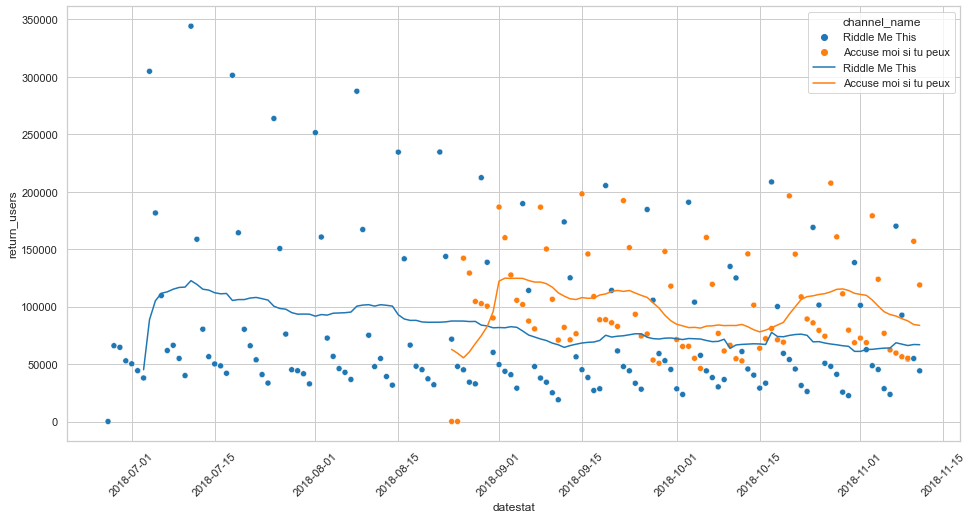

In [10]:
# Observation du nombre de return_users
plt.figure(figsize=(16,8))
sns.scatterplot(data = df_snap_audience_filter, x='datestat', y='return_users', hue='channel_name')
weekAverage = df_snap_audience_filter['return_users'].rolling(7).mean()
sns.lineplot(data=df_snap_audience_filter, x='datestat', y=weekAverage, hue='channel_name')
plt.xticks(rotation=45);

In [11]:
mean = pd.pivot_table(df_snap_audience_filter, index='channel_name', aggfunc='mean')
med = pd.pivot_table(df_snap_audience_filter, index='channel_name', aggfunc='median')
print('########################## Moyenne ##########################', '\n')
print(mean.return_users)
print('########################## Mediane ##########################', '\n')
print(med.return_users)

########################## Moyenne ########################## 

channel_name
Accuse moi si tu peux    99417.57500
Riddle Me This           81739.07971
Name: return_users, dtype: float64
########################## Mediane ########################## 

channel_name
Accuse moi si tu peux    86692
Riddle Me This           51740
Name: return_users, dtype: int64


**Remarque(s)** = Le nombre d'utilisateurs qui retourne sur la chaine est très variable, toutefois il reste stable autour de 100k en moyenne pour la chaine Fr et 81k en moyenne pour la chaine US. Une légère tendance à la baisse est aussi observé pour la chaine US.

## Conclusion

On observe sur les deux chaines un nombre de followers qui augmente rapidement puis une diminution. La fréquence, les nouveaux utilisateurs ainsi que le nombre d'utilisateurs qui retourne sur les chaines est très variable. A ce stade il serait judicieux de corréler les vus utilisateurs avec **les dates de libération de contenue sur la plateforme**.